# Analyzing scaling with mass 
Nov 24, 2021 \
Venkitesh Ayyar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
%matplotlib widget

In [3]:
from ipywidgets import *
from scipy import fftpack
from matplotlib.colors import LogNorm, PowerNorm, Normalize

In [4]:
# Load data
def f_get_data(fname):
    arr=np.loadtxt(fname,delimiter=',',dtype=str)
    arr_iters=arr[:,0].astype(int) # First element is iteration number
    arr1=arr[:,1:-1].astype(float)  # Skip last element (null string) and first (iteration)
    del(arr)
    # print(arr1.shape)
    L=int(np.sqrt(arr1.shape[1])) # Get lattice size
    num=arr1.shape[0]
    print(L)
    # a3=arr1.reshape(134,L,L) :  simple reshape doesn't do it in the correct order
    ## Reshape to 2D image
    arr2=np.empty((num,L,L),dtype=float)
    for i in range(num): 
        for x in range(L):
            for y in range(L):
                arr2[i,x,y]=arr1[i,x+y*L]

    print(arr2.shape)
    
    return arr2


def f_rescale(arr,mean):
    a1=np.array([np.abs((i-mean)) for i in arr])
    return a1

   
# f_rescale(arr_lst[0][:5],soln)

In [5]:
# def f_spectrum(arr):
#     F2 = fftpack.fft2((arr))
#     # F2 = fftpack.fftshift(F2)
    
#     ### Absolute value of F-transform
#     F2 = np.abs(F2)**2
    
#     return F2 

def f_spectrum(arr):
    F2 = np.fft.fft2(arr)
    F2=np.fft.fftshift(F2,axes=None)
    ### Absolute value of F-transform
    F2 = np.abs(F2)**2
    
    return F2 

def f_batch_spectrum(arr):
    P_k=[f_spectrum(i) for i in arr]
    return np.array(P_k)



In [6]:
# fname='../results_phi.txt'
# fname='../results_residue.txt'
# a1=f_get_data(fname)

In [155]:
arr_type='phi'
m=0.2

# arr_type='residue'
lst=['lvl2_tl','lvl2_1copy','lvl2_2copy','lvl2_3copy','lvl2_4copy','lvl3_tl']
lst2=['results_{0}_m{1}_{2}.txt'.format(arr_type,m,i) for i in lst]

num=len(lst)
arr_lst=[]
for i in range(num):     
    # fname='../'+lst2[i]
    fname='../stored_results/2_64_ntl/'+lst2[i]
    print(fname)
    arr_lst.append(f_get_data(fname))

../stored_results/2_64_ntl/results_phi_m0.2_lvl2_tl.txt
64
(22, 64, 64)
../stored_results/2_64_ntl/results_phi_m0.2_lvl2_1copy.txt
64
(22, 64, 64)
../stored_results/2_64_ntl/results_phi_m0.2_lvl2_2copy.txt
64
(19, 64, 64)
../stored_results/2_64_ntl/results_phi_m0.2_lvl2_3copy.txt
64
(39, 64, 64)
../stored_results/2_64_ntl/results_phi_m0.2_lvl2_4copy.txt
64
(107, 64, 64)
../stored_results/2_64_ntl/results_phi_m0.2_lvl3_tl.txt
64
(9, 64, 64)


In [156]:
labels_lst=['tl_2lvl','ntl_1copy','ntl_2copy','ntl_3copy','ntl_4copy','tl_3lvl']
# labels_lst=['a','b','c','d','e']


In [157]:
# arr_type='phi'
# # arr_type='residue'
# lst=['1_gs','1_jc','2_mg-1level1itr','3_mg-1level5itr','4_mg-4level5itr']
# lst2=['stored_results/2_32_0.04_gs/'+'results_{0}_{1}.txt'.format(arr_type,i) for i in lst]

# num=len(lst)
# arr_lst=[]
# for i in range(num):     
#     fname='../'+lst2[i]
#     print(fname)
#     arr_lst.append(f_get_data(fname))

In [158]:
# Convert phi to error
err_lst=[]
soln=arr_lst[0][-1] ## Pick best solution
for i,arr in enumerate(arr_lst):
    print(i,arr.shape)
    err_lst.append(f_rescale(arr_lst[i],soln))


0 (22, 64, 64)
1 (22, 64, 64)
2 (19, 64, 64)
3 (39, 64, 64)
4 (107, 64, 64)
5 (9, 64, 64)


In [159]:
## Compute spectrum
aspec_lst=[f_batch_spectrum(arr)[:] for arr in err_lst]

In [160]:
# k=16
# print(arr_lst[0][-1,k,k],arr_lst[1][-1,k,k],arr_lst[2][-1,k,k],arr_lst[3][-1,k,k])
# print(err_lst[0][-1,k,k],err_lst[1][-1,k,k],err_lst[2][-1,k,k],err_lst[3][-1,k,k])

### Debug single run

#### Convergence of spectral values

In [161]:
def f_plot_spec_iteration(arr,kx,ky):
    L=arr.shape[-1]
    id_x,id_y=kx+L//2,ky+L//2
    plt.figure()
    plt.plot(arr[1:,id_x,id_y]/np.max(arr[1:,id_x,id_y]),marker='o',linestyle='')
    plt.xlabel('Iteration')
    plt.yscale('log')
    plt.show()
# f_plot_spec_iteration(aspec_lst[0],0,0)

kmax=aspec_lst[0].shape[1]//2
interact(f_plot_spec_iteration,arr=fixed(aspec_lst[0]),kx=IntSlider(min=-kmax,max=kmax-1,step=1),ky=IntSlider(min=-kmax,max=kmax-1,step=1))



interactive(children=(IntSlider(value=0, description='kx', max=31, min=-32), IntSlider(value=0, description='k…

<function __main__.f_plot_spec_iteration(arr, kx, ky)>

error = (phi - solution) \
FFT of $ error[x,y] \rightarrow error[kx,ky] $ \
Plotting : $$ \frac{\mbox{error}[iter, kx, ky]}{max(\mbox{error}[iter,kx,ky])} $$ 

(22, 64, 64)


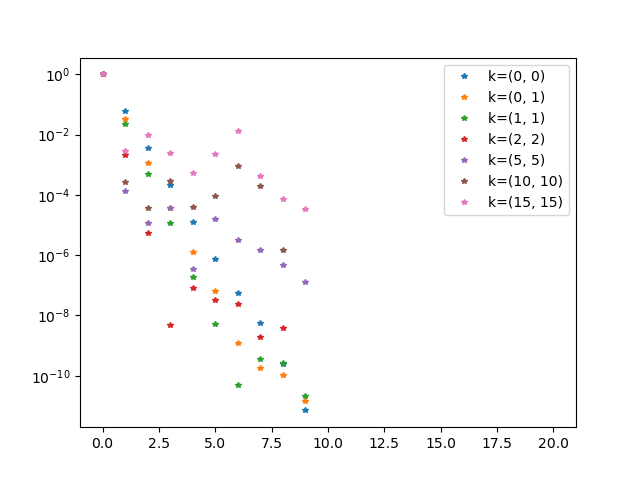

In [162]:
def f_grid_iter_plot(arr,klist):
    
    fig=plt.figure()

    size=len(klist)
    cols=max(size//2,1)
    cols=min(cols,4)
    rows=int(np.ceil(size/cols))
    # rows,cols=2,2
    
    L=arr.shape[-1]
    print(arr.shape)
    # arr=arr[:]/np.max(arr)
    for count,k in enumerate(klist):
        kx,ky=k[0],k[1]
        id_x,id_y=kx+L//2,ky+L//2
        # fig.add_subplot(rows,cols,count+1)
        # plt.plot(arr[1:,id_x,id_y], marker='*',markersize=4,linestyle='',label="k="+str(k))
        plt.plot(arr[1:,id_x,id_y]/np.max(arr[1:,id_x,id_y]), marker='*',markersize=4,linestyle='',label="k="+str(k))
        plt.legend()
        plt.yscale('log')
    plt.show()

klist=[(0,0),(0,1),(1,1),(2,2),(5,5),(10,10),(15,15)]
f_grid_iter_plot(aspec_lst[0][:5000],klist)


Slopes: 

0 : (1-0.56)/600 : 0.0008
1 : (1-5e-6)/600 : 0.002
2 : (1-3e-4)/200 : 0.005
3 : (1-1e-5)/75 :  0.013
4 : (1-6e-6)/10  : 0.1

### Compare different runs

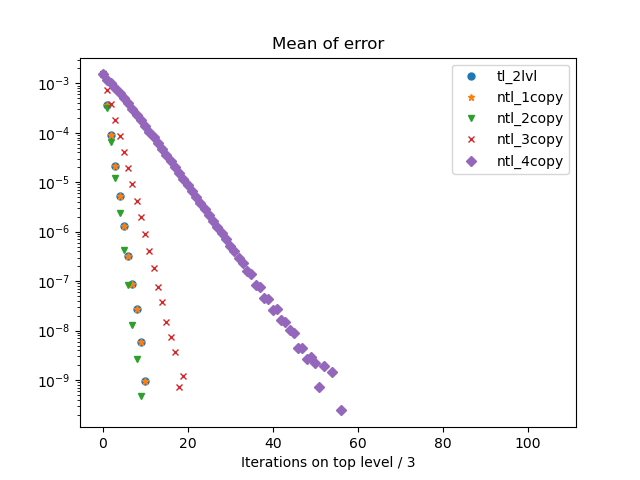

In [163]:
# Plot mean absolute error
def f_plot_mean_err(arrlist,labellist):
    fig=plt.figure()
        
    mrkrs=['o','*','v','x','D','H','s','8','p']
    for count,(lbl,mrkr) in enumerate(zip(labellist,mrkrs)):
        arr=arrlist[count]
        ans=np.mean(arr,axis=(1,2))
        plt.plot(ans, marker=mrkr,markersize=5,linestyle='',label=lbl)

        plt.legend()
    plt.yscale('log')
    plt.title('Mean of error')
    plt.xlabel('Iterations on top level / 3')
    plt.show()

f_plot_mean_err(err_lst[:5],labels_lst[:5])

In [164]:
# Plot Spectral coefficients
def f_compare_runs(arrlist,labellist,kx,ky):
    fig=plt.figure()

    size=len(labellist)
    cols=max(size//2,1)
    cols=min(cols,4)
    rows=int(np.ceil(size/cols))
    # rows,cols=2,2
    
    L=arr.shape[-1]
    id_x,id_y=kx+L//2,ky+L//2
        
    mrkrs=['o','*','v','x','D','H','s','8','p']
    for count,(lbl,mrkr) in enumerate(zip(labellist,mrkrs)):
        a_spec=arrlist[count]
        # fig.add_subplot(rows,cols,count+1)
        plt.plot(a_spec[1:,id_x,id_y], marker=mrkr,markersize=5,linestyle='',label=lbl)

        plt.legend()
    plt.yscale('log')
    plt.title('Fourier coefficient of Error for kx=%s, ky=%s'%(kx,ky))
    plt.xlabel('Iterations on top level / 3')
    plt.show()
    
# f_compare_runs(aspec_lst[:],labels_lst[:],2,0)

In [165]:
kmax=arr_lst[0].shape[-1]//2

interact(f_compare_runs,arrlist=fixed(aspec_lst[:5]),labellist=fixed(labels_lst[:5]),kx=IntSlider(min=-kmax,max=kmax-1,step=1),ky=IntSlider(min=-kmax,max=kmax-1,step=1))


interactive(children=(IntSlider(value=0, description='kx', max=31, min=-32), IntSlider(value=0, description='k…

<function __main__.f_compare_runs(arrlist, labellist, kx, ky)>

## Plot convergence speed

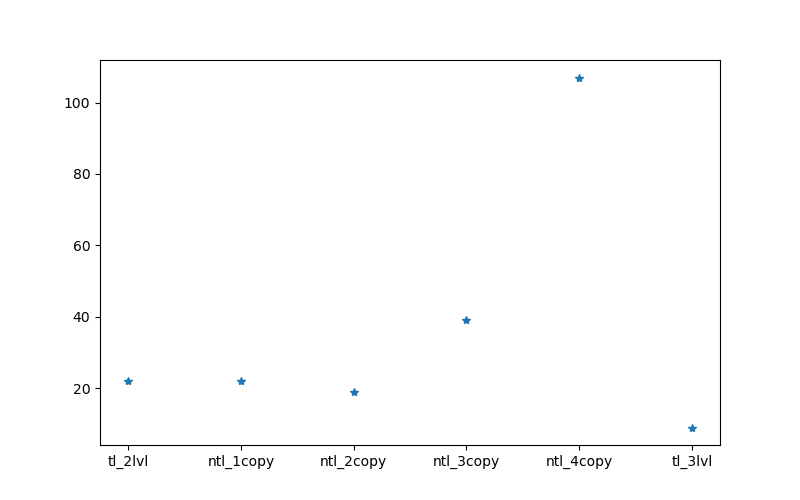

In [166]:
labels_lst
max_itrs_lst=[i.shape[0] for i in err_lst]

plt.figure(figsize=(8,5))
plt.plot(labels_lst,max_itrs_lst,marker='*',linestyle='')